<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_6/Aula_2_Analisando_a_base_de_cadastro_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando conteúdo anterior

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_cad = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/raw/main/Data/clientes_cadastrados.txt")
ids_repetidos = df_cad[df_cad.loc[:,"ID_Cliente"].duplicated(keep = False)].loc[:,"ID_Cliente"]
df_cad_no_rep = df_cad.drop(ids_repetidos.index)

In [3]:
df_cad_no_rep.head(6)

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
5,5008810,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


# Sessão - Variáveis contínuas/quantitativas

In [4]:
quant_cols = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [5]:
df_cad_no_rep.loc[:,quant_cols].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


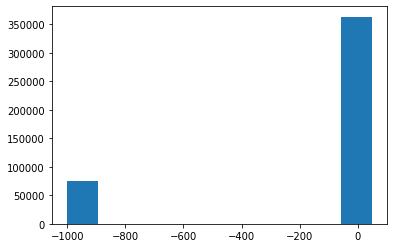

In [6]:
plt.hist(df_cad_no_rep.loc[:,"Anos_empregado"])
plt.show()

In [7]:
print(df_cad_no_rep.query("Anos_empregado <= 0").loc[:,["Anos_empregado", "Categoria_de_renda"]].value_counts())
# valor de -1000 provavelmente é um identificador de pensionista
print()
df_cad_no_rep.query("Anos_empregado < 0").loc[:,["Anos_empregado", "Categoria_de_renda"]].value_counts()
# valor de -1000 provavelmente é um identificador de pensionista

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64



Anos_empregado  Categoria_de_renda
-1000.7         Pensionista           75314
dtype: int64

In [8]:
df_cad_no_rep.loc[:,"Anos_empregado"] = df_cad_no_rep.loc[:,"Anos_empregado"].replace(-1000.7, -1) # convertendo para um valor simbólico que não altere a distribuição mas mantenha a natureza de < 0

In [9]:
df_cad_no_rep

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1.0
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1.0


# Sessão 2 - Outliers

In [10]:
import seaborn as sns
sns.set()

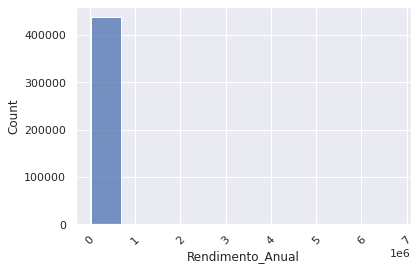

In [11]:
sns.histplot(data = df_cad_no_rep, x = "Rendimento_Anual", bins = 10)
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


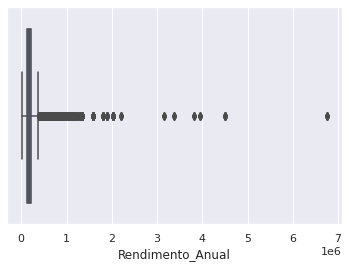

In [12]:
sns.boxplot(df_cad_no_rep.loc[:,"Rendimento_Anual"])

In [13]:
rend = df_cad_no_rep.loc[:,"Rendimento_Anual"]
rend_mean = rend.mean()
rend_std = rend.std()

lim_sup = rend_mean + (2 * rend_std)
lim_inf = rend_mean - (2 * rend_std)

index_outliers = []

for index, valor in rend.items():
  if valor > lim_sup or valor < lim_inf:
    index_outliers.append(index)

len(index_outliers)

12641

In [14]:
df_cad_no_out = df_cad_no_rep.drop(index_outliers)
df_cad_no_out.shape

(425822, 18)

In [15]:
df_cad_no_out.loc[:,quant_cols].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


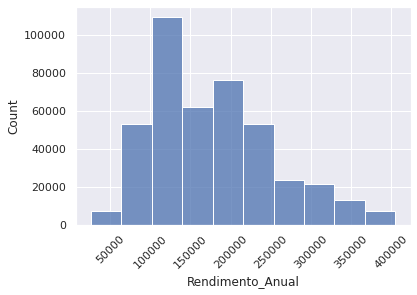

In [16]:
sns.histplot(data = df_cad_no_out, x = "Rendimento_Anual", bins = 10)
plt.xticks(rotation = 45)
plt.show()

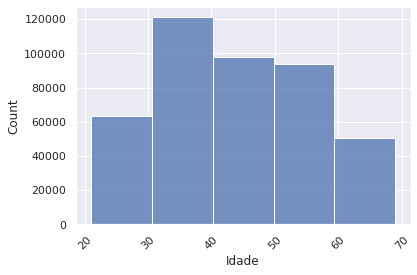

In [17]:
sns.histplot(data = df_cad_no_out, x = "Idade", bins = 5)
plt.xticks(rotation = 45)
plt.show()

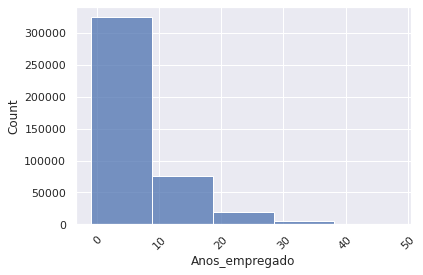

In [18]:
sns.histplot(data = df_cad_no_out, x = "Anos_empregado", bins = 5)
plt.xticks(rotation = 45)
plt.show()

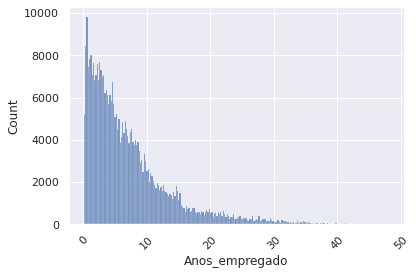

In [19]:
sns.histplot(data = df_cad_no_out.query("Anos_empregado > 0"), x = "Anos_empregado")
plt.xticks(rotation = 45)
plt.show()

# Sessão 3 - Variáveis categóricas

In [21]:
df_cad_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             425822 non-null  int64  
 1   Genero                 425822 non-null  object 
 2   Tem_Carro              425822 non-null  int64  
 3   Tem_Casa_Propria       425822 non-null  int64  
 4   Qtd_Filhos             425822 non-null  int64  
 5   Rendimento_Anual       425822 non-null  float64
 6   Categoria_de_renda     425822 non-null  object 
 7   Grau_Escolaridade      425822 non-null  object 
 8   Estado_Civil           425822 non-null  object 
 9   Moradia                425822 non-null  object 
 10  Idade                  425822 non-null  float64
 11  Tem_Celular            425822 non-null  int64  
 12  Tem_telefone_trabalho  425822 non-null  int64  
 13  Tem_telefone_fixo      425822 non-null  int64  
 14  Tem_email              425822 non-nu

In [22]:
cat_cols = ["Genero", "Tem_Carro", "Tem_Casa_Propria", "Categoria_de_renda", "Grau_escolaridade", "Estado_civil",
            "Moradia", "Tem_Celular", "Tem_telefone_trabalho", "Tem_telefone_fixo", "Tem_email", "Ocupacao"]

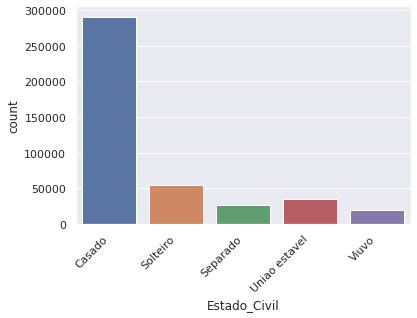

In [29]:
sns.countplot(data = df_cad_no_out, x = "Estado_Civil")
plt.xticks(rotation = 45, ha = "right")
plt.show()

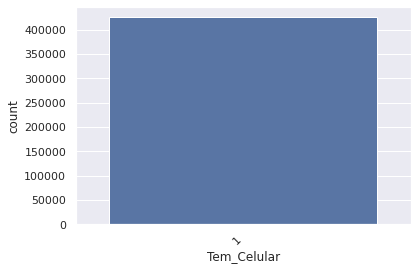

In [30]:
sns.countplot(data = df_cad_no_out, x = "Tem_Celular")
plt.xticks(rotation = 45, ha = "right")
plt.show()

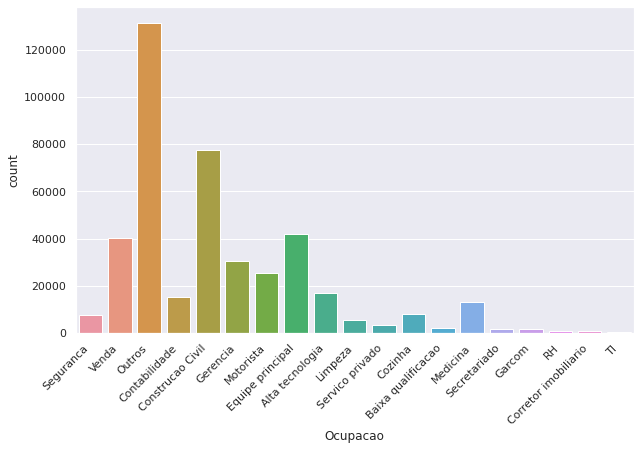

In [33]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df_cad_no_out, x = "Ocupacao")
plt.xticks(rotation = 45, ha = "right")
plt.show()

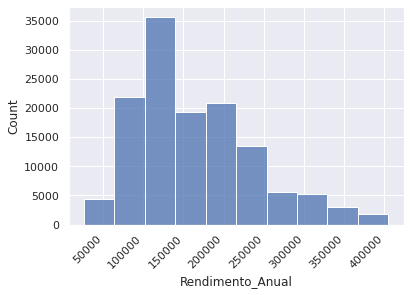

In [36]:
sns.histplot(data = df_cad_no_out.query("Ocupacao == 'Outros'"), x = "Rendimento_Anual", bins = 10)
plt.xticks(rotation = 45, ha = "right")
plt.show()

In [39]:
df_cad_tratamento1 = df_cad_no_out.drop(["Genero", "Tem_Celular"], axis = 1)
df_cad_tratamento1.shape

(425822, 16)

In [42]:
cat_cols.remove("Genero")
cat_cols.remove("Tem_Celular")

In [43]:
cat_cols

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_escolaridade',
 'Estado_civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']